In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('dataset.csv')
data.shape

(11055, 32)

In [3]:
data.head

<bound method NDFrame.head of        index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service   
0          1                          -1              1                   1  \
1          2                           1              1                   1   
2          3                           1              0                   1   
3          4                           1              0                   1   
4          5                           1              0                  -1   
...      ...                         ...            ...                 ...   
11050  11051                           1             -1                   1   
11051  11052                          -1              1                   1   
11052  11053                           1             -1                   1   
11053  11054                          -1             -1                   1   
11054  11055                          -1             -1                   1   

       having_At_Symb

In [4]:
data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [5]:
# The 'Result' column is the target variable, find the count of each class (legitimate and phishing) in the dataset
print("number of Legitimate URLs", len(data[data['Result']==1]))
print("Number of Phishing URLs", len(data[data['Result']==-1]))

number of Legitimate URLs 6157
Number of Phishing URLs 4898


In [7]:
# find the correlation between the variables, 
# When one variable increases as the other increases the correlation is positive; 
# when one decreases as the other increases it is negative. 
# Complete absence of correlation is represented by 0.
correlation = data.corr()
correlation

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IPhaving_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


<Axes: >

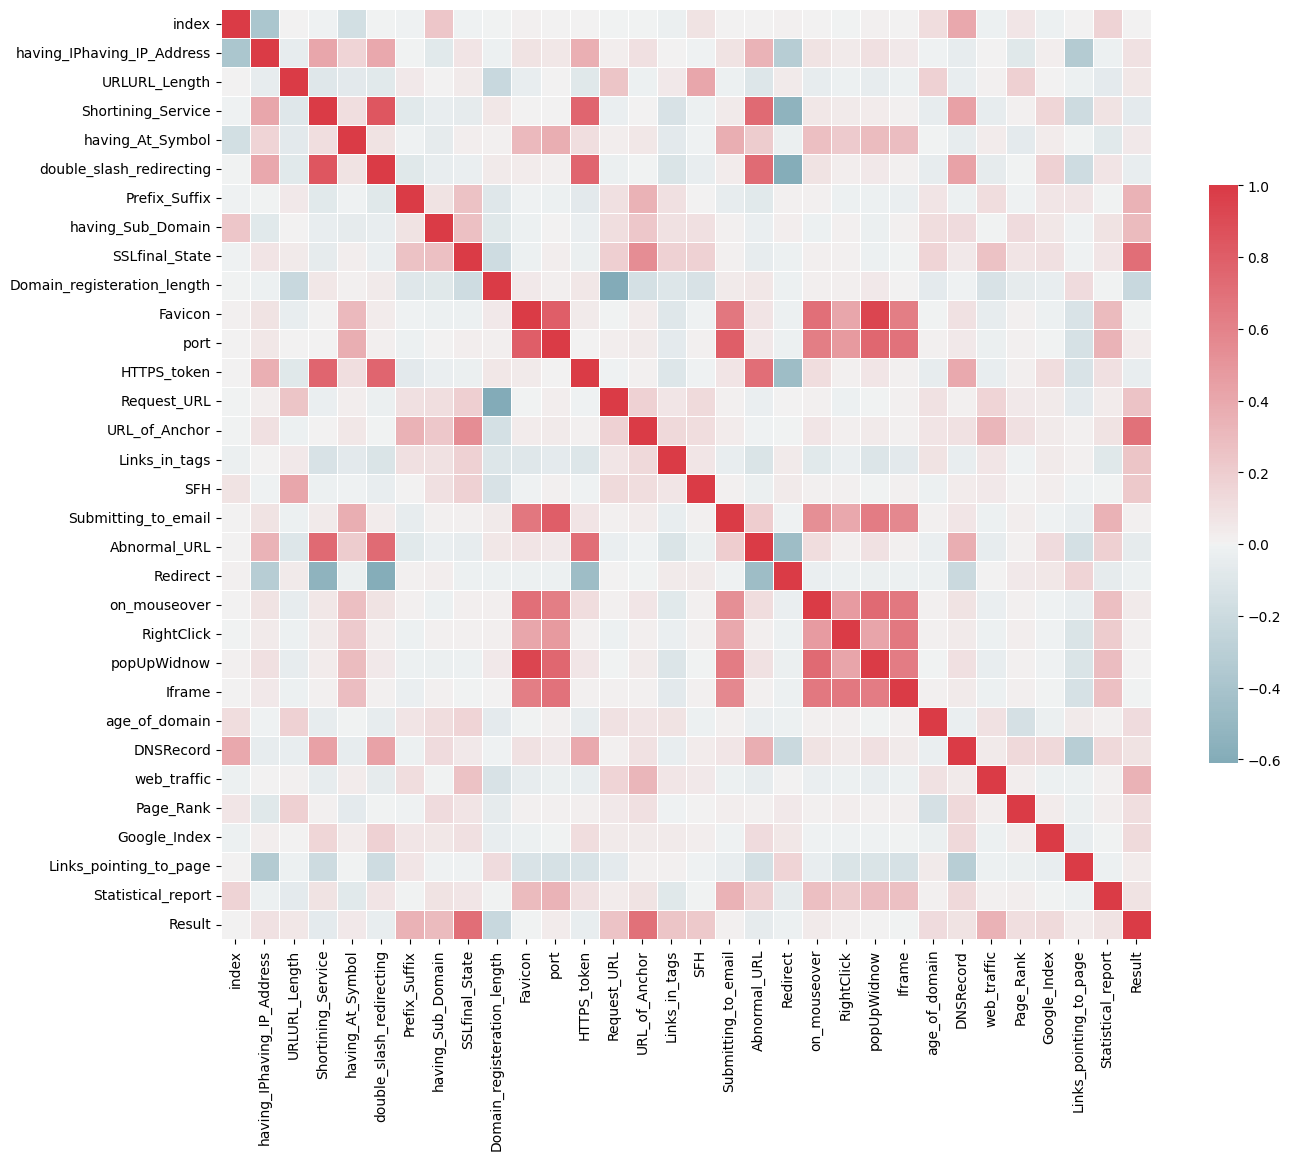

In [13]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
# We will use Random Forest Classifier to train the model
import sklearn as skl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn import preprocessing

In [17]:
data2 = skl.utils.shuffle(data)
X = data2.drop("Result",axis=1).values
X = preprocessing.scale(X)
y = data2['Result'].values


In [18]:
data2.head

<bound method NDFrame.head of        index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service   
3351    3352                           1              0                   1  \
7972    7973                           1             -1                   1   
2107    2108                           1             -1                   1   
7411    7412                           1             -1                   1   
8180    8181                          -1              0                   1   
...      ...                         ...            ...                 ...   
2640    2641                           1             -1                   1   
5559    5560                           1              0                   1   
4616    4617                           1             -1                   1   
1101    1102                           1              1                   1   
10090  10091                          -1             -1                  -1   

       having_At_Symb

In [21]:
# Evalution Metrics

scoring = {'accuracy': 'accuracy', 'recall':'recall', 'precision':'precision', 'f1':'f1'}
folds = 10

In [22]:
# Function to calculate the mean of the metrics
def mean_score(scores):
    return {k:np.mean(v) for k,v in scores.items()}

In [23]:
randomForestClass = RandomForestClassifier(n_estimators=100)
# cross validation will be done using 10 folds and the scoring metrics will be accuracy, recall, precision and f1
crossValScores = cross_validate(randomForestClass, X, y, cv=folds, scoring=scoring)
randomForestClassScore = mean_score(crossValScores)
print(randomForestClassScore)

{'fit_time': 0.6026379823684692, 'score_time': 0.026900553703308107, 'test_accuracy': 0.968974168050862, 'test_recall': 0.9772619047619049, 'test_precision': 0.9673928570740766, 'test_f1': 0.9722927001488829}


In [24]:
# Testing for Logistic regression
from sklearn.linear_model import LogisticRegression

In [25]:
logisticRegClass = LogisticRegression(random_state=1)
crossValScores = cross_validate(logisticRegClass, X, y, cv=folds, scoring=scoring)
logisticRegClassScore = mean_score(crossValScores)
print(logisticRegClassScore)

{'fit_time': 0.11699826717376709, 'score_time': 0.012540435791015625, 'test_accuracy': 0.9276333123317487, 'test_recall': 0.9451005701615458, 'test_precision': 0.926637528930746, 'test_f1': 0.9357014591413696}
